<a href="https://colab.research.google.com/github/dsercam/TC033/blob/main/TC4033_Activity2c_Group44.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font color='darkorange'><b> TC 5033 :: Advanced Machine Learning Methods </b> </font>
### <font color='darkgray'><b> Activity 2b: Building a CNN for *CIFAR10 Dataset* with PyTorch </b></font></br></br>
###<font color='darkblue'><b>  Group 44 </b></font>
***Dante Rodrigo Serna Camarillo A01182676***</br>
***Axel Alejandro Tlatoa Villavicencio A01363351***</br>
***Carlos Roberto Torres Ferguson A01215432***</br>
***Felipe de Jesús Gastélum Lizárraga A01114918***

# TC 5033
## Deep Learning
## Convolutional Neural Networks
<br>

#### Activity 2b: Building a CNN for CIFAR10 dataset with PyTorch
<br>

- Objective

    The main goal of this activity is to further your understanding of Convolutional Neural Networks (CNNs) by building one using PyTorch. You will apply this architecture to the famous CIFAR10 dataset, taking what you've learned from the guide code that replicated the Fully Connected model in PyTorch (Activity 2a).

- Instructions
    This activity requires submission in teams of 3 or 4 members. Submissions from smaller or larger teams will not be accepted unless prior approval has been granted (only due to exceptional circumstances). While teamwork is encouraged, each member is expected to contribute individually to the assignment. The final submission should feature the best arguments and solutions from each team member. Only one person per team needs to submit the completed work, but it is imperative that the names of all team members are listed in a Markdown cell at the very beginning of the notebook (either the first or second cell). Failure to include all team member names will result in the grade being awarded solely to the individual who submitted the assignment, with zero points given to other team members (no exceptions will be made to this rule).

    Understand the Guide Code: Review the guide code from Activity 2a that implemented a Fully Connected model in PyTorch. Note how PyTorch makes it easier to implement neural networks.

    Familiarize Yourself with CNNs: Take some time to understand their architecture and the rationale behind using convolutional layers.

    Prepare the Dataset: Use PyTorch's DataLoader to manage the dataset. Make sure the data is appropriately preprocessed for a CNN.

    Design the CNN Architecture: Create a new architecture that incorporates convolutional layers. Use PyTorch modules like nn.Conv2d, nn.MaxPool2d, and others to build your network.

    Training Loop and Backpropagation: Implement the training loop, leveraging PyTorch’s autograd for backpropagation. Keep track of relevant performance metrics.

    Analyze and Document: Use Markdown cells to explain your architectural decisions, performance results, and any challenges you faced. Compare this model with your previous Fully Connected model in terms of performance and efficiency.

- Evaluation Criteria

    - Understanding of CNN architecture and its application to the CIFAR10 dataset
    - Code Readability and Comments
    - Appropriateness and efficiency of the chosen CNN architecture
    - Correct implementation of Traning Loop and Accuracy Function
    - Model's performance metrics on the CIFAR10 dataset (at least 65% accuracy)
    - Quality of Markdown documentation

- Submission

Submit via Canvas your Jupyter Notebook with the CNN implemented in PyTorch. Your submission should include well-commented code and Markdown cells that provide a comprehensive view of your design decisions, performance metrics, and learnings.

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.utils.data import sampler
import torchvision.datasets as datasets
import torchvision.transforms as T
import matplotlib.pyplot as plt
#only if you have jupyterthemes - Commented this out as we are running this at colab.....
#from jupyterthemes import jtplot
#jtplot.style()

### Download Cifar10 dataset

In [ ]:
torch.cuda.is_available()

False

### <font color="darkblue"> **1. Data set download** </font>
>>Data sets files will be saved at the *CIFAR10* folder</br>
>>> *Training* data set will have be 50,000 samples in size</br>
>>> *Validation* data set will have be 50,000 samples in size</br>
>>> *Testing* data set will have be 50,000 samples in size</br>
</br></br>

*   <font color="darkorange"> torchvision.transforms.Compose -> </font> Used to compose multiple transformes together</br>
*   <font color="darkorange"> torchvision.transforms.ToTensor -> </font> This method is used to convert a PIL Image or ndarray to a tensor and scale the values accordingly. ndarray in this excerise.</br>
*   <font color="darkorange"> torchvision.transforms.Normalize -> </font> This method is used to normalize a tensor image with mean and standard deviation.

</br>

> What is CIFAR10 anyways?


```
#Accoridng to wikipedia:
   "The CIFAR-10 dataset (Canadian Institute For Advanced Research) is a collection of images
   that are commonly used to train machine learning and computer vision algorithms.
   It is one of the most widely used datasets for machine learning research."
```



In [ ]:
DATA_PATH = '/CIFAR10'
NUM_TRAIN = 50000
NUM_VAL = 5000
NUM_TEST = 5000
MINIBATCH_SIZE = 64

#SET transformers
transform_cifar = T.Compose(
# first convert our image to tensor
[T.ToTensor(),
# then normalize our tensor
# using means (sequence) for each channel as: [0.491, 0.482, 0.447]
# using std (sequence) for each channel as: [0.247, 0.243, 0.261]
T.Normalize([0.491, 0.482, 0.447], [0.247, 0.243, 0.261])])

# Train dataset
# get our training data set appy our transformer
cifar10_train = datasets.CIFAR10(DATA_PATH, train=True, download=True, transform=transform_cifar)
train_loader = DataLoader(cifar10_train, batch_size=MINIBATCH_SIZE, sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN)))

#Validation set
# get our validation data set (non-trainning data) appy our transformer
cifar10_val = datasets.CIFAR10(DATA_PATH, train=False, download=True, transform=transform_cifar)
val_loader = DataLoader(cifar10_val, batch_size=MINIBATCH_SIZE, sampler=sampler.SubsetRandomSampler(range(NUM_VAL)))

#Test set
# get our test data set (non-trainning data) appy our transformer
cifar10_test = datasets.CIFAR10(DATA_PATH, train=False, download=True, transform=transform_cifar)
test_loader = DataLoader(cifar10_test, batch_size=MINIBATCH_SIZE, sampler=sampler.SubsetRandomSampler(range(NUM_TEST, len(cifar10_test))))

100%|██████████| 170498071/170498071 [00:03<00:00, 49555739.63it/s]


Extracting /CIFAR10/cifar-10-python.tar.gz to /CIFAR10
Files already downloaded and verified
Files already downloaded and verified


> Our CIFAR10 train data set contians indeed 50,000 samples and was given our transfomations correctly by the composer

In [ ]:
cifar10_train

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: /CIFAR10
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=[0.491, 0.482, 0.447], std=[0.247, 0.243, 0.261])
           )

> Validate our training data set was given the correct batch size of 64

In [ ]:
train_loader.batch_size

64

In [ ]:
for i, (x, y) in enumerate(train_loader):
    print(x, y)

Se han truncado las últimas 5000 líneas del flujo de salida.
          [ 3.7779e-01,  7.6129e-02,  4.0954e-01,  ...,  4.5717e-01,
            3.6191e-01,  5.2068e-01],
          ...,
          [ 9.4935e-01,  1.9337e+00,  1.8067e+00,  ...,  9.2006e-02,
            8.8585e-01,  1.5685e+00],
          [ 4.7305e-01,  1.7432e+00,  1.8543e+00,  ..., -2.0965e-01,
            5.6831e-01,  1.3621e+00],
          [ 2.9840e-01,  1.3304e+00,  1.8861e+00,  ..., -5.2719e-01,
            1.0788e-01,  1.2669e+00]],

         [[-7.7318e-01, -5.3111e-01,  3.0808e-01,  ...,  8.0836e-01,
            6.7925e-01,  7.5995e-01],
          [-2.8903e-01, -2.5676e-01,  3.7263e-01,  ...,  3.0808e-01,
            2.4352e-01,  4.8560e-01],
          [ 1.9511e-01, -2.2448e-01,  1.4525e-03,  ...,  3.2422e-01,
            2.4352e-01,  3.7263e-01],
          ...,
          [ 3.7263e-01,  1.3409e+00,  1.3086e+00,  ..., -6.3100e-02,
            7.4381e-01,  1.3732e+00],
          [-6.3100e-02,  1.1634e+00,  1.3732e+00,  

### Using  GPUs

> Running this in colab will use the CPU

In [ ]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
print(device)

cpu


### Mostrar imágenes

### <font color="darkblue"> **Plotting an image** </font>
>> Method *plot_figure* will plot a given image

La imagen muestreada representa un: frog


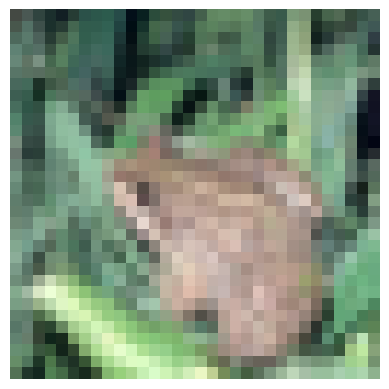

In [ ]:
classes = test_loader.dataset.classes
def plot_figure(image):
    plt.imshow(np.transpose(image,(1,2,0)))
    plt.axis('off')
    plt.show()

#plot a randomimage of our training data set
rnd_sample_idx = np.random.randint(len(test_loader))
#Add some text specifying what class does the image represent
print(f'La imagen muestreada representa un: {classes[test_loader.dataset[rnd_sample_idx][1]]}')
image = test_loader.dataset[rnd_sample_idx][0]
image = (image - image.min()) / (image.max() -image.min() )
plot_figure(image)


### <font color="darkblue"> **Plotting samples of each calss at a grid** </font>
>> Method *plot_cifar10_grid* will plot a grid of containing 8 samples of each class (10 per test_loader.dataset.classes)

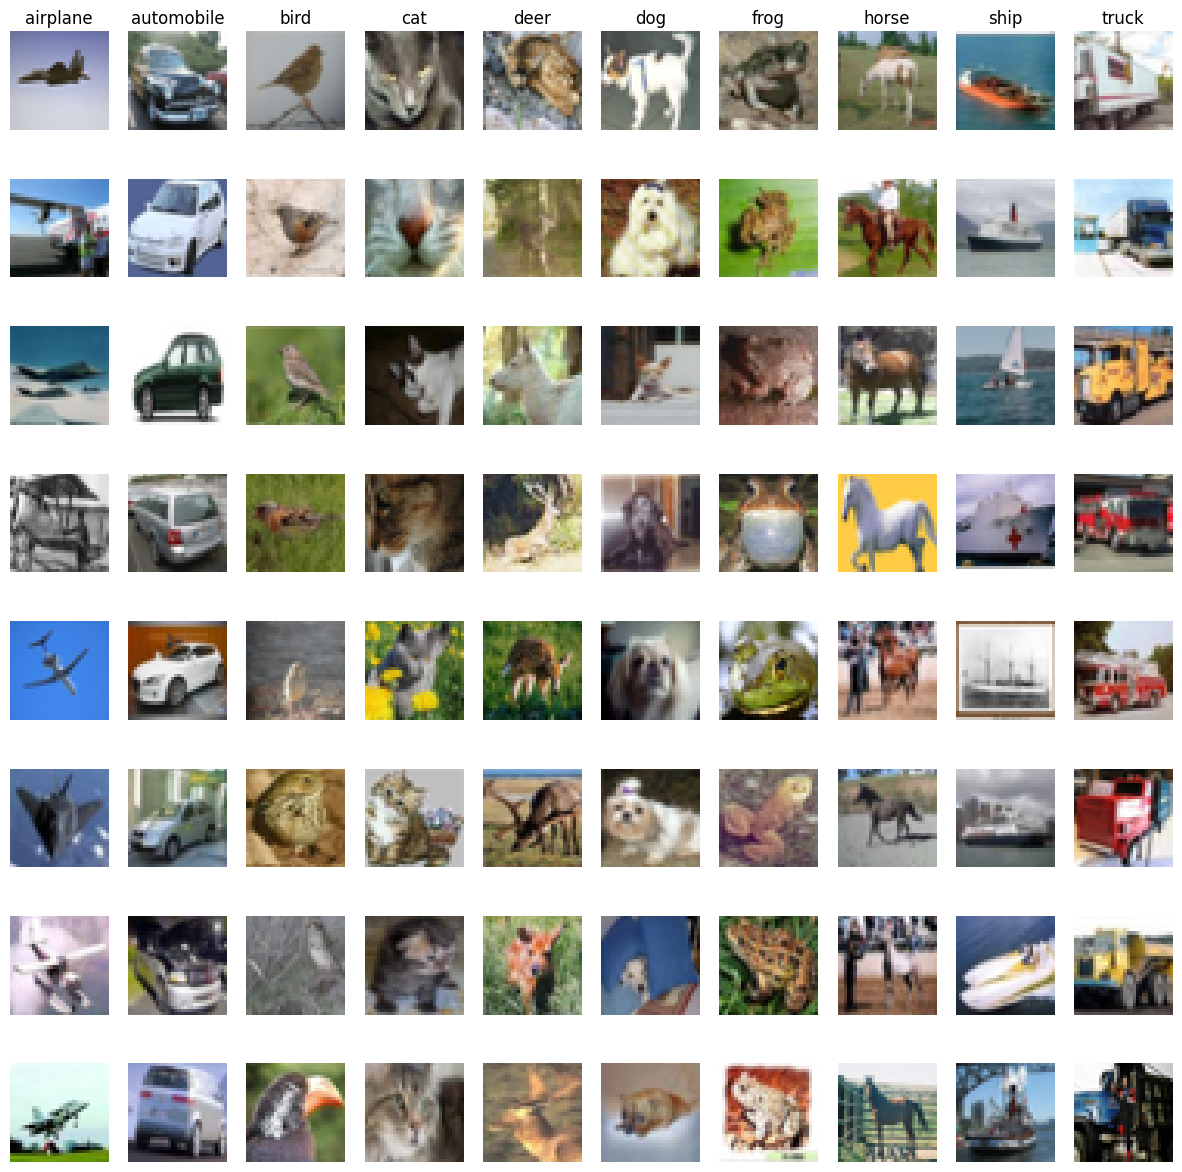

In [ ]:
def plot_cifar10_grid():
    #get the classes of our training set
    classes = test_loader.dataset.classes
    #set the number of desired samples
    total_samples = 8
    #size of the plot
    plt.figure(figsize=(15,15))
    for label, sample in enumerate(classes):
        class_idxs = np.flatnonzero(label == np.array(test_loader.dataset.targets))
        sample_idxs = np.random.choice(class_idxs, total_samples, replace = False)
        for i, idx in enumerate(sample_idxs):
            plt_idx = i*len(classes) + label + 1
            plt.subplot(total_samples, len(classes), plt_idx)
            plt.imshow(test_loader.dataset.data[idx])
            plt.axis('off')

            if i == 0: plt.title(sample)
    plt.show()

plot_cifar10_grid()

### <font color="darkblue"> **Accuracy method** </font>


> We will only send our model and our loader (which is an iterable wrapper of the data set)
>> Method has a cumulative count of correct prediction for all minibatches and will return the accuracy for the predictions

In [ ]:
def accuracy(model, loader):
    correctPrediction = 0 #initialize to zero
    totalPredictions = 0 #initiliaze to zero
    cost = 0  #cummulative coat, initilize to zero
    #Need to be sure we are using our evaluation mode to use the correct behavior, we are calculating accuracy, we are not training
    model.eval()
    #let the chosen device use our model (CPU when run in colab)
    model = model.to(device=device)
    #we are not training, we don't use gradient
    with torch.no_grad():
        for x, y in loader: #for isntance of our given set
            x = x.to(device=device, dtype = torch.float32)
            y = y.to(device=device, dtype = torch.long)
            scores = model(x)
            _, pred = scores.max(dim=1)
            correctPrediction += (pred == y).sum()
            totalPredictions += pred.size(0)

        return float(correctPrediction)/totalPredictions


### <font color="darkblue"> **Training method** </font>


> We send our model, optimisier, training set, validation set, and number of desired epochs, defualt epochs is 100 (though this default number of epochs could be decreased based on intended model)


In [ ]:
def train(model, optimiser, givenLoader, givenValidationLoader, epochs=100):
    #send model to CPU and (when in colab) To GPU otherwise
    model = model.to(device=device)

    #For the specified number of epochs
    for epoch in range(epochs):
        #for each epoch...
        for x, y in givenLoader:
            #IMPORTANT! use training mode instead of eval mode
            model.train()
            x = x.to(device=device, dtype=torch.float32)
            y = y.to(device=device, dtype=torch.long)
            scores = model(x)
            # funcion cost
            cost = F.cross_entropy(input= scores, target=y)
            # avoid cummulative gradient
            optimiser.zero_grad()
            cost.backward()
            optimiser.step()
        #calculate accuracy on each epoch
        validationAccuracy = accuracy(model, givenValidationLoader)
        #print accuracy and cost per epoch
        print(f'Epoch:{epoch}, validationAccuracy: {validationAccuracy:.6f}, cost: {cost}')

### <font color="darkblue"> **Linear Model as baseline** </font>

> we will use a linear modal with two layers to generate a baseline to compare our CNN model performance


In [ ]:
#Linear model with 2 layers
layers1 = 256
layers2 = 256
lr = 1e-3
epochsLinear = 10
linearModel = nn.Sequential(nn.Flatten(),
                       nn.Linear(in_features=32*32*3, out_features=layers1), nn.ReLU() , #input calculated as 3 channels and 32*32 images
                       nn.Linear(in_features=layers1, out_features=layers2), nn.ReLU() ,
                       nn.Linear(in_features=layers2, out_features=10)) #for our 10 output classes
optimiser = torch.optim.Adam(linearModel.parameters(), lr=lr)

> our baseline reached out to ~0.53 accuracy rate.

In [ ]:
train(linearModel, optimiser, train_loader, val_loader, epochsLinear)

Epoch:0, validationAccuracy: 0.474200, cost: 1.5992023944854736
Epoch:1, validationAccuracy: 0.503000, cost: 1.4136732816696167
Epoch:2, validationAccuracy: 0.498200, cost: 0.8659179210662842
Epoch:3, validationAccuracy: 0.519800, cost: 1.0729645490646362
Epoch:4, validationAccuracy: 0.531200, cost: 1.0528709888458252
Epoch:5, validationAccuracy: 0.516200, cost: 1.1332156658172607
Epoch:6, validationAccuracy: 0.525600, cost: 1.6135661602020264
Epoch:7, validationAccuracy: 0.516800, cost: 0.8065370917320251
Epoch:8, validationAccuracy: 0.520800, cost: 0.6448903679847717
Epoch:9, validationAccuracy: 0.536800, cost: 0.6031290888786316


### <font color="darkblue"> **Sequential CNN model** </font>

> we will use two CNN layers </br>
>> First layer uses 16 filters </br>
>> Second layer uses 32 filters </br>


In [ ]:
CHANNEL1 = 16
CHANNEL2 = 32
epochsCNN1 = 10
lr = 1e-3
cnnModel = nn.Sequential(nn.Conv2d(in_channels=3, out_channels=CHANNEL1, kernel_size=3, padding=1), nn.ReLU(), # output  defined as 32*32*16, kept dimensions using padding
                         nn.Conv2d(in_channels=CHANNEL1, out_channels=CHANNEL2, kernel_size=3, padding=1), nn.ReLU(), # output  defined as 32*32*32, kept dimensions using padding, used input size defined by previous layer
                         nn.MaxPool2d(2,2),
                         nn.Flatten(),
                         nn.Linear(in_features=16*16*CHANNEL2, out_features=10))

optimiser = torch.optim.Adam(cnnModel.parameters(), lr=lr)

> Obtained an accuracy of 0.65 using this model

In [ ]:
train(cnnModel, optimiser, train_loader, val_loader, epochsLinear)

Epoch:0, validationAccuracy: 0.636400, cost: 1.0548940896987915
Epoch:1, validationAccuracy: 0.660600, cost: 0.9039715528488159
Epoch:2, validationAccuracy: 0.678600, cost: 1.0978009700775146
Epoch:3, validationAccuracy: 0.686600, cost: 0.473196417093277
Epoch:4, validationAccuracy: 0.684000, cost: 0.7275624871253967
Epoch:5, validationAccuracy: 0.682200, cost: 0.9181721806526184
Epoch:6, validationAccuracy: 0.669000, cost: 0.6111360192298889
Epoch:7, validationAccuracy: 0.678200, cost: 0.45159217715263367
Epoch:8, validationAccuracy: 0.680000, cost: 0.6453178524971008
Epoch:9, validationAccuracy: 0.666000, cost: 0.3354053795337677


In [ ]:
accuracy(cnnModel, test_loader)

0.6544

### <font color="darkblue"> **Second CNN config** </font>
> we will use three CNN layers </br>
>> First layer uses 16 filters </br>
>> Second layer uses 32 filters </br>
>> Second layer uses 64 filters </br>
>> Updated learning rate to 0.0001 </br>
>> Will only use 10 epochs as execution time is increased. </br>

In [ ]:
channel0 = 16
channel1 = 32
channel2 = 64
epochsCNN1 = 10
lr = 0.0001
cnnModel2 = nn.Sequential(nn.Conv2d(in_channels=3, out_channels=channel0, kernel_size=3, padding=1), nn.ReLU(),  # 32 * 32 * 16
                         nn.Conv2d(in_channels=channel0, out_channels=channel1, kernel_size=3, padding=1), nn.ReLU(),  # 32 * 32 * 32
                         nn.MaxPool2d(2,2), # 16 * 16
                         nn.Conv2d(in_channels=channel1, out_channels=channel2, kernel_size=3, padding=1), nn.ReLU(), # 16 * 16 * 64
                         nn.Flatten(),
                         nn.Linear(in_features=16*16*channel2, out_features=10))

optimiser = torch.optim.Adam(cnnModel2.parameters(), lr=lr)

In [ ]:
train(cnnModel2, optimiser, train_loader, val_loader, epochsCNN1)

Epoch:0, validationAccuracy: 0.504600, cost: 1.2135039567947388
Epoch:1, validationAccuracy: 0.552600, cost: 1.0282973051071167
Epoch:2, validationAccuracy: 0.583400, cost: 1.1210733652114868
Epoch:3, validationAccuracy: 0.600200, cost: 1.4343763589859009
Epoch:4, validationAccuracy: 0.619400, cost: 0.9479223489761353
Epoch:5, validationAccuracy: 0.636000, cost: 0.996479868888855
Epoch:6, validationAccuracy: 0.648800, cost: 0.5461349487304688
Epoch:7, validationAccuracy: 0.656000, cost: 1.2014847993850708
Epoch:8, validationAccuracy: 0.667400, cost: 0.8361486196517944
Epoch:9, validationAccuracy: 0.675400, cost: 0.7473341822624207


> Obtained an accuracy of 0.6612 using this model, which is a small increase against our first attempt.
> We can also tell that the training accuracy was continousley increasing on each epoch, it would be interesting to train the model for more epochs or try an increase of 2n on the layers, but that would mean a significant increase on execution time on google colab.

In [ ]:
accuracy(cnnModel2, test_loader)

0.6612

### <font color="darkblue"> **Second CNN config** </font>
> we will use three CNN layers </br>
>> First layer uses 8 filters </br>
>> Second layer uses 16 filters </br>
>> Second layer uses 32 filters </br>
>> Updated learning rate back to 1e-3 </br>
>> Will only use 10 epochs as execution time is increased. </br>

In [ ]:
channel0 = 8
channel1 = 16
channel2 = 32
epochsCNN1 = 10
lr = 1e-3
cnnModel3 = nn.Sequential(nn.Conv2d(in_channels=3, out_channels=channel0, kernel_size=3, padding=1), nn.ReLU(),  # 32 * 32 * 8
                         nn.Conv2d(in_channels=channel0, out_channels=channel1, kernel_size=3, padding=1), nn.ReLU(),  # 32 * 32 * 16
                         nn.Conv2d(in_channels=channel1, out_channels=channel2, kernel_size=3, padding=1), nn.ReLU(), # 16 * 16 * 32
                         nn.MaxPool2d(2,2), # 16 * 16
                         nn.Flatten(),
                         nn.Linear(in_features=16*16*channel2, out_features=10)) # 16 * 16 * 32

optimiser = torch.optim.Adam(cnnModel3.parameters(), lr=lr)

In [ ]:
train(cnnModel3, optimiser, train_loader, val_loader, epochsCNN1)

Epoch:0, validationAccuracy: 0.601400, cost: 1.1259845495224
Epoch:1, validationAccuracy: 0.650800, cost: 0.6480901837348938
Epoch:2, validationAccuracy: 0.658800, cost: 1.2287384271621704
Epoch:3, validationAccuracy: 0.683600, cost: 1.0115933418273926
Epoch:4, validationAccuracy: 0.673400, cost: 0.6041167378425598
Epoch:5, validationAccuracy: 0.661000, cost: 1.0170493125915527
Epoch:6, validationAccuracy: 0.675400, cost: 0.5979722738265991
Epoch:7, validationAccuracy: 0.652400, cost: 0.9618113040924072
Epoch:8, validationAccuracy: 0.652800, cost: 0.5176389813423157
Epoch:9, validationAccuracy: 0.657800, cost: 0.4321644902229309


> Obtained an accuracy of 0.655 using this configuration, we can also tell the accuracy increased and decreased a bit during training, we can tell that the model will three layers but more filters with layers had a better performance.

In [ ]:
accuracy(cnnModel3, test_loader)

0.655